In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/MyDrive/text_classification/' 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve,auc
import string

In [ ]:
# Read the data and take only 1000 Reviews
df = pd.read_excel(path+'123.xlsx')
print("Total Reviews:",len(df),
      "\nTotal Correct Sentences:",len(df[df.category=='correct']),
      "\nTotal Inorrect Sentences:",len(df[df.category=='incorrect']))

Total Reviews: 4404 
Total Correct Sentences: 2156 
Total Inorrect Sentences: 2248


In [ ]:
pip install bnlp-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 51.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=2b84077b89b55ba822ddc8afc0d252e1cdd4d6d91f93231f81b806b9c221c134
  Stored in directory: /root/.cache/pip/wheels/fa/7a/e9/22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
  Created wheel for gensim: filename=gensim-4.0.1-cp39-cp39-linux_x86_64.whl size=26057891 sha256=3b9adeb0e0ff297f92eac9d044e0ea76e529898a924103e8e9e5735b6ff32d2a


In [ ]:
from bnlp import POS
bn_pos = POS()
model_path = "/content/drive/MyDrive/text_classification/bn_pos.pkl"
pos_data = []
for i in df['content']:
      r= bn_pos.tag(model_path,i)
      pos_data.append(r)

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.9/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
mod_data = []
for i in range(len(pos_data)):
  data = ' '
  for j in range(len(pos_data[i])):
    for text in pos_data[i][j]:
      data = data + text + " "
  mod_data.append({
      'content': data.strip()
  })
mod_data = pd.DataFrame(mod_data)
mod_data

,content
0,আপনার PPR সাথে PP আমার PPR একটি JQ গোপন NC পরা...
1,আপনার PPR সঙ্গে PP আমার PPR একটি JQ গোপনীয় JJ ...
2,তোমার PPR সাথে PP আমার PPR একটি JQ গোপন NC পরা...
3,তোমার PPR সঙ্গে PP আমার PPR একটি JQ গোপনীয় JJ ...
4,মনে NC রাখবে VM আবশ্যকীয় JJ ব্যয়ে NC কার্পণ্যত...
...,...
4399,মূমুর্ষু NC অবস্থায় NC স্যার NC হাসপাতালে NC র...
4400,মূমুর্ষু NC অবস্থায় NC রহিম NP সাহেব NP হাসপাত...
4401,তার PPR দুর্নীবার JQ ইচ্ছা NC শক্তি NC বাধা NC...
4402,ব্যাকরন NC বইটি NC নিয়ে VM আসো VAUX । PU


In [ ]:
df['content'] = mod_data['content'] 

In [ ]:
df

,content,category
0,আপনার PPR সাথে PP আমার PPR একটি JQ গোপন NC পরা...,incorrect
1,আপনার PPR সঙ্গে PP আমার PPR একটি JQ গোপনীয় JJ ...,correct
2,তোমার PPR সাথে PP আমার PPR একটি JQ গোপন NC পরা...,incorrect
3,তোমার PPR সঙ্গে PP আমার PPR একটি JQ গোপনীয় JJ ...,correct
4,মনে NC রাখবে VM আবশ্যকীয় JJ ব্যয়ে NC কার্পণ্যত...,incorrect
...,...,...
4399,মূমুর্ষু NC অবস্থায় NC স্যার NC হাসপাতালে NC র...,incorrect
4400,মূমুর্ষু NC অবস্থায় NC রহিম NP সাহেব NP হাসপাত...,incorrect
4401,তার PPR দুর্নীবার JQ ইচ্ছা NC শক্তি NC বাধা NC...,incorrect
4402,ব্যাকরন NC বইটি NC নিয়ে VM আসো VAUX । PU,incorrect


In [ ]:
df.category[df['category']=='correct']=0
df.category[df['category']=='incorrect']=1

In [ ]:
df['category']= df.category.astype(float)

In [ ]:
df.dtypes

content      object
category    float64
dtype: object

In [ ]:
df.category.value_counts()

1.0    2248
0.0    2156
Name: category, dtype: int64

In [ ]:
count_class_1, count_class_0 = df.category.value_counts()

In [ ]:
df_class_0 = df[df['category'] == 0]
df_class_1 = df[df['category'] == 1]


In [ ]:
df_class_0

,content,category
1,আপনার PPR সঙ্গে PP আমার PPR একটি JQ গোপনীয় JJ ...,0.0
3,তোমার PPR সঙ্গে PP আমার PPR একটি JQ গোপনীয় JJ ...,0.0
5,মনে NC রাখবে VM আবশ্যকীয় JJ ব্যয়ে NC কার্পণ্য ...,0.0
7,আজ ALC সুধীমন্ডলী JJ উপস্থিত JJ আছেন VM । PU,0.0
9,সুধীমন্ডলী JJ এ DAB বিষয়ে NC মতামত NC দিয়েছেন ...,0.0
...,...,...
4378,তিনি PPR আমাকে PPR ব্যাকরণ NC বইটি NC আমাকে PP...,0.0
4380,রহিম NP আমাকে PPR ব্যাকরণ NC বইটি NC আমাকে PPR...,0.0
4383,তার PPR হৃদয় VM - PU ক্ষেত্রে NC আশার NC বীজ N...,0.0
4384,রহিমের NC হৃদয় VM - PU ক্ষেত্রে NC আশার NC বীজ...,0.0


In [ ]:
count_class_1

2248

In [ ]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_over = pd.concat([df_class_1, df_class_0_over], axis=0)

In [ ]:
print('Random over-sampling:')
print(df_over.category.value_counts())

Random over-sampling:
1.0    2248
0.0    2248
Name: category, dtype: int64


In [ ]:
df_over.content.shape

(4496,)

In [ ]:
X1 = df_over.drop('category',axis='columns')
y1 = df_over['category']

In [ ]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


reviews_lines1=list()
lines=X1['content'].values.tolist()

for line in lines:
  tokens=word_tokenize(line)
  # tokens=[word.lower() for word in tokens]
  # table=str.maketrans('','',string.punctuation)
  # stripped=[w.translate(table) for w in tokens]
  # words=[word for word in stripped if word.isalpha()]
  # stop_words= set(stopwords.words('bengali'))
  # words=[w for w in words if not w in stop_words]
  reviews_lines1.append(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokens

['ঘরে',
 'NC',
 'ঘরে',
 'NC',
 'দুর্গ',
 'NC',
 'গড়ে',
 'VM',
 'তুল',
 'VAUX',
 '।',
 'PU']

In [ ]:
len(lines)

4496

In [ ]:
! pip install gensim==3.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.0-cp39-cp39-linux_x86_64.whl size=24952699 sha256=b8808f01d2e5c73e76ff7324d88bc92ffa8441a8c4d2a1644bba5ac4eb074eda
  Stored in directory: /root/.cache/pip/wheels/fb/18/fa/2a0084905c1be0cead09a515d05015c1f939afb16fd7893ff4
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.0.1
    Uninstalling gensim-4.0.1:
      Successfully uninstalled gensim-4.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bnlp-toolkit 3.3.0 requires gensim==4.0.1, but you have gensim 3.8.0 which is incompatible.


In [ ]:
import gensim
EMBEDDING_DIM=100
model=gensim.models.Word2Vec(sentences=reviews_lines1, window=5,min_count=1)
words= list(model.wv.index_to_key)
print("vocabulary Size: %d" %len(words))

vocabulary Size: 2142


In [ ]:
model.wv.most_similar("তোমার")

[('আমি', 0.9989174008369446),
 ('তার', 0.9988937377929688),
 ('দেখে', 0.9987964034080505),
 ('আমাদের', 0.9987941384315491),
 ('আমার', 0.9986896514892578),
 ('করিম', 0.9986828565597534),
 ('মনে', 0.9986699819564819),
 ('ব্যাপারে', 0.9986630082130432),
 ('সকলের', 0.9985033273696899),
 ('তুমি', 0.9984395503997803)]

In [ ]:
filename = 'novel_embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [ ]:
import os
embedding_index={}

f = open('novel_embedding_word2vec.txt',encoding='utf-8')
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:])
  embedding_index[word]=coefs

f.close()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


VALIDATION_SPLIT= 0.1

tokenizer_obj= Tokenizer()
tokenizer_obj.fit_on_texts(reviews_lines1)
sequences= tokenizer_obj.texts_to_sequences(reviews_lines1)

max_length=15

word_index=tokenizer_obj.word_index

review_pad= pad_sequences(sequences,maxlen=max_length)
sentiment=y1.values

print(review_pad.shape)
print(sentiment.shape)
indices=np.arange(review_pad.shape[0])
np.random.shuffle(indices)

review_pad=review_pad[indices]
sentiment=sentiment[indices]
num_validation_samples=int(VALIDATION_SPLIT*review_pad.shape[0])
X_val_pad= review_pad[:num_validation_samples]
y_val=sentiment[:num_validation_samples]
X_train_pad= review_pad[num_validation_samples:]
y_train=sentiment[num_validation_samples:]


(4496, 15)
(4496,)


In [ ]:
TEST_SPLIT=0.20
num_test_samples = int(TEST_SPLIT*X_train_pad.shape[0])

X_test= X_train_pad[:num_test_samples]
y_test= y_train[:num_test_samples]
X_train=X_train_pad[num_test_samples:]
y_train= y_train[num_test_samples:]


In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_val_pad.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(3238, 15)
(3238,)
(449, 15)
(449,)
(809, 15)
(809,)


In [ ]:
EMBEDDING_DIM=100
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,EMBEDDING_DIM))

for word, i in word_index.items():
  if i>num_words:
    continue
  embedding_vector=embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

# **K-Nearest Neighbor(KNN)**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn_model.fit(X_train,y_train)
knn_train = knn_model.score(X_train,y_train)
print('Training Accuracy:')
print(knn_train)

Training Accuracy:
0.9481161210623842


In [ ]:
knn_test = knn_model.score(X_test,y_test)
print('Testing Accuracy:')
print(knn_test)

Testing Accuracy:
0.8405438813349815


In [ ]:
k_pred= knn_model.predict(X_test)

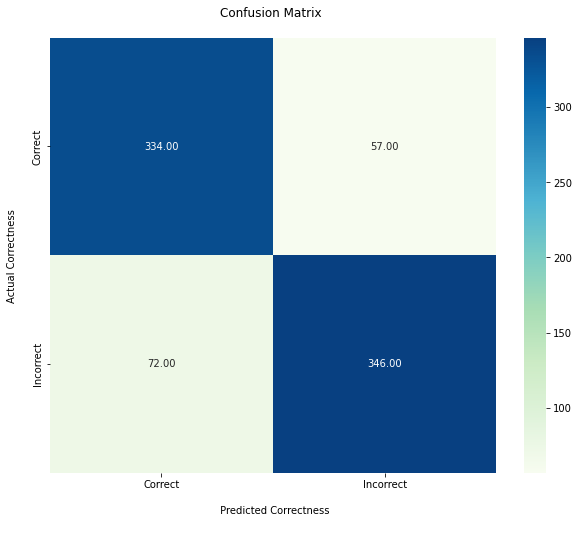

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,k_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, k_pred))
print('Precision:',precision_score(y_test, k_pred))
print('F1 score:', f1_score(y_test, k_pred))
print('Accuracy:',accuracy_score(y_test, k_pred))

recall: 0.8277511961722488
Precision: 0.858560794044665
F1 score: 0.8428745432399514
Accuracy: 0.8405438813349815


## **Logistic Regression**

In [ ]:
lr_model= LogisticRegression(random_state=0)  
lr_model.fit(X_train, y_train)  
lr_train = lr_model.score(X_train,y_train)
print('Training Accuracy:',lr_train)

Training Accuracy: 0.5630018529956763


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr_test = lr_model.score(X_test,y_test)
print('Testing Accuracy:', lr_test)

Testing Accuracy: 0.5475896168108776


In [ ]:
lr_pred= lr_model.predict(X_test)

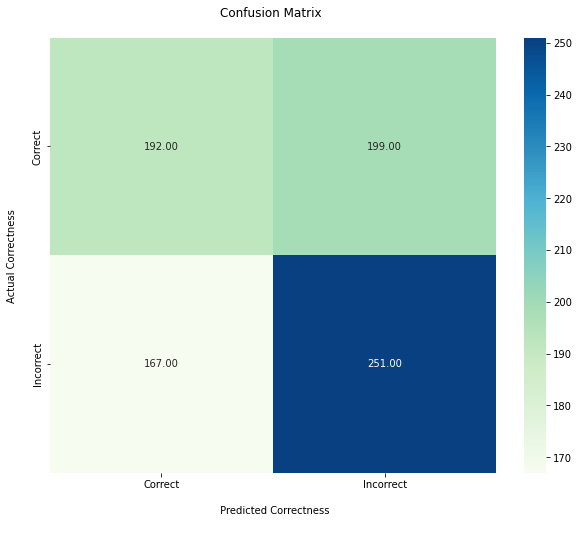

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,lr_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, lr_pred))
print('Precision:',precision_score(y_test, lr_pred))
print('F1 score:', f1_score(y_test, lr_pred))
print('Accuracy:',accuracy_score(y_test, lr_pred))

recall: 0.6004784688995215
Precision: 0.5577777777777778
F1 score: 0.5783410138248849
Accuracy: 0.5475896168108776


### Random Forest

In [ ]:
rf_model= RandomForestClassifier(n_estimators = 100)  
rf_model.fit(X_train, y_train)  
rf_train = rf_model.score(X_train,y_train)
print('Training Accuracy:',rf_train)

Training Accuracy: 0.9916615194564546


In [ ]:
rf_test = rf_model.score(X_test,y_test)
print('Testing Accuracy:', rf_test)

Testing Accuracy: 0.9517923362175525


In [ ]:
rf_pred= rf_model.predict(X_test)

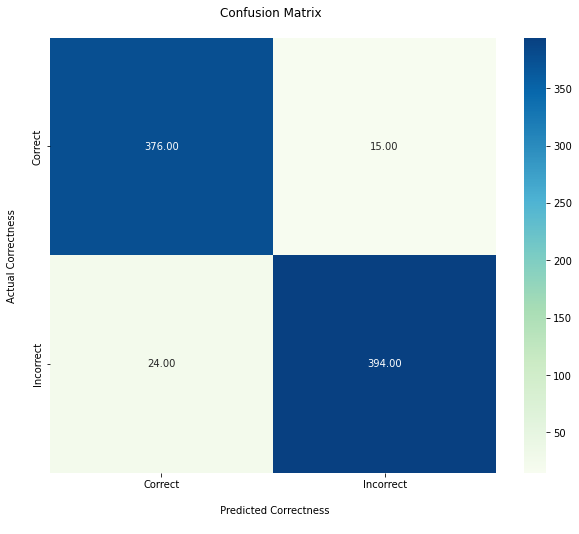

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,rf_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, rf_pred))
print('Precision:',precision_score(y_test, rf_pred))
print('F1 score:', f1_score(y_test, rf_pred))
print('Accuracy:',accuracy_score(y_test, rf_pred))

recall: 0.9425837320574163
Precision: 0.9633251833740831
F1 score: 0.9528415961305925
Accuracy: 0.9517923362175525


### Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)  
dt_train = dt_model.score(X_train,y_train)
print('Training Accuracy:',dt_train)

Training Accuracy: 0.9916615194564546


In [ ]:
dt_test = dt_model.score(X_test,y_test)
print('Testing Accuracy:', dt_test)

Testing Accuracy: 0.9517923362175525


In [ ]:
dt_pred= dt_model.predict(X_test)

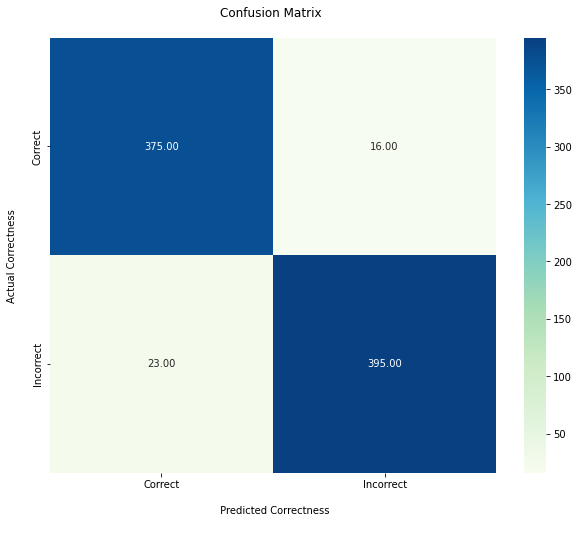

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,dt_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, dt_pred))
print('Precision:',precision_score(y_test, dt_pred))
print('F1 score:', f1_score(y_test, dt_pred))
print('Accuracy:',accuracy_score(y_test, dt_pred))

recall: 0.9449760765550239
Precision: 0.9610705596107056
F1 score: 0.9529553679131484
Accuracy: 0.9517923362175525


### Multinomial Naive Bayes

In [ ]:
mnb_model = MultinomialNB(alpha=0.15)
mnb_model.fit(X_train, y_train)  
mnb_train = mnb_model.score(X_train,y_train)
print('Training Accuracy:',mnb_train)

Training Accuracy: 0.5188387893761581


In [ ]:
mnb_test = mnb_model.score(X_test,y_test)
print('Testing Accuracy:', mnb_test)

Testing Accuracy: 0.4919653893695921


In [ ]:
mnb_pred= mnb_model.predict(X_test)

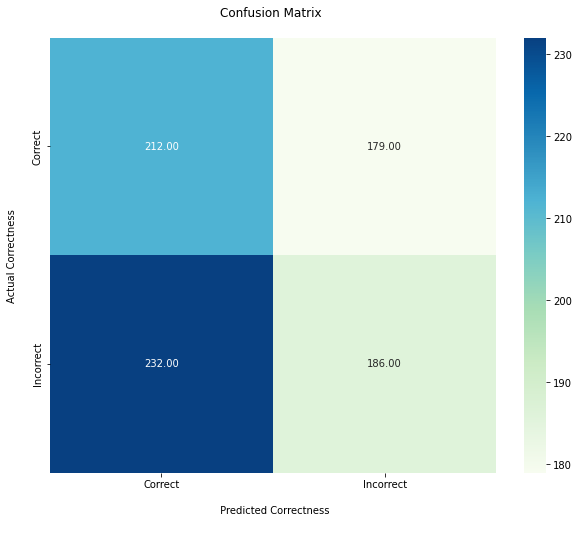

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()


In [ ]:
print('recall:',recall_score(y_test, mnb_pred))
print('Precision:',precision_score(y_test, mnb_pred))
print('F1 score:', f1_score(y_test, mnb_pred))
print('Accuracy:',accuracy_score(y_test, mnb_pred))

recall: 0.4449760765550239
Precision: 0.5095890410958904
F1 score: 0.47509578544061304
Accuracy: 0.4919653893695921


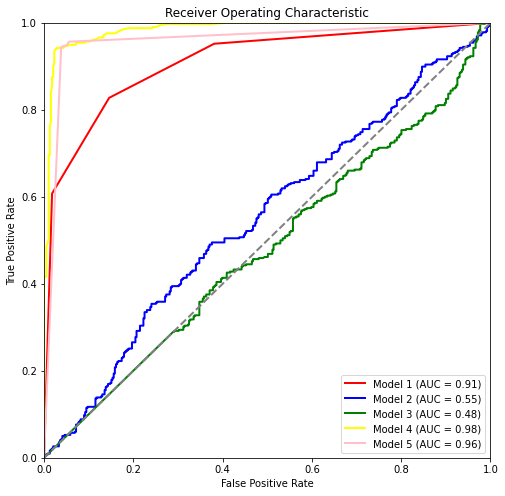

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define list of models
models = [knn_model, lr_model, mnb_model,rf_model , dt_model ]

# Define colors for each model's curve
colors = ['red', 'blue', 'green','yellow','pink' ]

# Initialize plot
plt.figure(figsize=(8, 8))

# Plot ROC curve for each model
for i, model in enumerate(models):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='Model %d (AUC = %0.2f)' % (i+1, roc_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Show plot
plt.show()


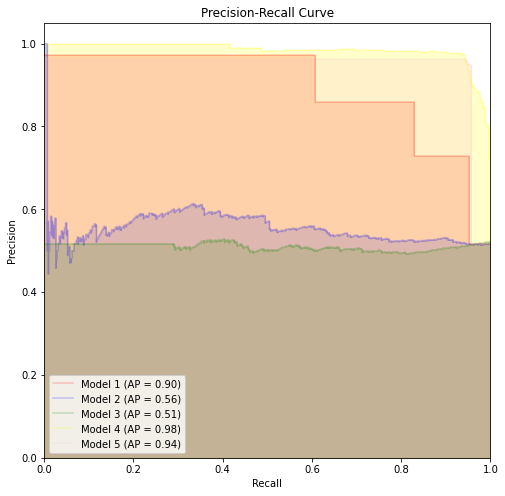

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Define list of models
models = [knn_model, lr_model, mnb_model,rf_model , dt_model ]

# Define colors for each model's curve
colors = ['red', 'blue', 'green','yellow','pink' ]

# Initialize plot
plt.figure(figsize=(8, 8))

# Plot precision-recall curve for each model
for i, model in enumerate(models):
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)
    plt.step(recall, precision, color=colors[i], alpha=0.2, where='post',
             label='Model %d (AP = %0.2f)' % (i+1, average_precision))
    plt.fill_between(recall, precision, step='post', alpha=0.2, color=colors[i])

# Set plot properties 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Show plot
plt.show()

# **BAGGING CLASSFIER**

In [ ]:
# define a decision tree classifier as the base estimator
base_estimator = DecisionTreeClassifier()

# define the bagging classifier with 100 estimators
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# train the bagging classifier on the training data
b_train = bagging.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
b_test = bagging.score(X_test,y_test)
print('Testing Accuracy:', b_test)

Testing Accuracy: 0.9542645241038319


In [ ]:
b_pred= bagging.predict(X_test)

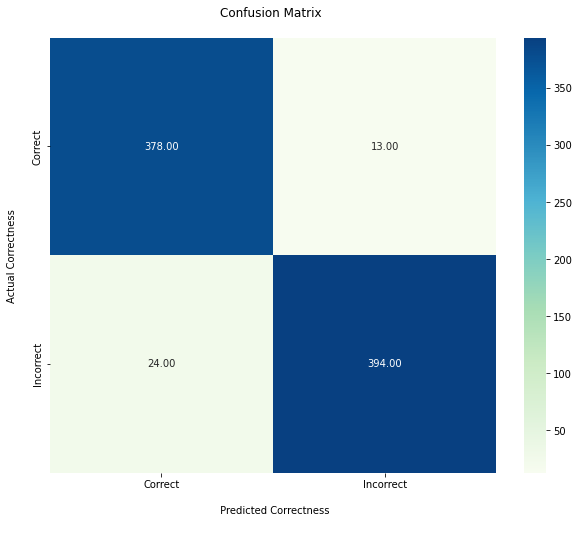

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,b_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, b_pred))
print('Precision:',precision_score(y_test, b_pred))
print('F1 score:', f1_score(y_test, b_pred))
print('Accuracy:',accuracy_score(y_test, b_pred))

recall: 0.9425837320574163
Precision: 0.9680589680589681
F1 score: 0.9551515151515151
Accuracy: 0.9542645241038319


# **STACKING CLASSIFIER**

In [ ]:
# define the base models
base_models = [('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
               ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))]

# define the meta model
meta_model = LogisticRegression()

# define the stacking classifier
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=KFold(n_splits=5))

# fit the stacking classifier on the training data
s_train=stacking.fit(X_train, y_train)

In [ ]:
s_test = stacking.score(X_test,y_test)
print('Testing Accuracy:', s_test)

Testing Accuracy: 0.9542645241038319


In [ ]:
s_pred= stacking.predict(X_test)

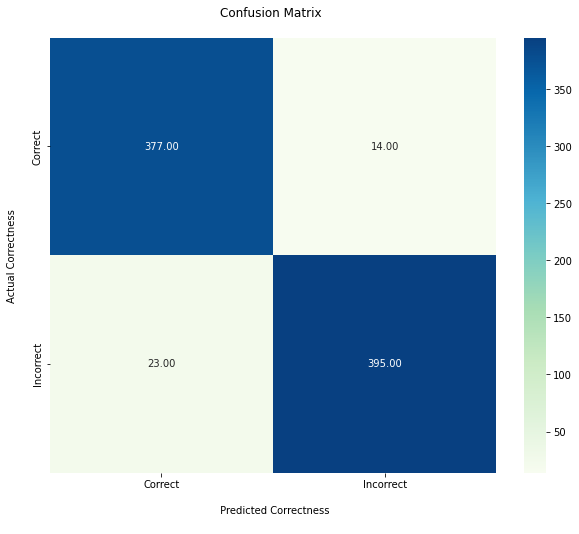

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,s_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, s_pred))
print('Precision:',precision_score(y_test, s_pred))
print('F1 score:', f1_score(y_test, s_pred))
print('Accuracy:',accuracy_score(y_test, s_pred))

recall: 0.9449760765550239
Precision: 0.9657701711491442
F1 score: 0.9552599758162031
Accuracy: 0.9542645241038319


# **VOTING CLASSIFIER**

In [ ]:
# Define the individual classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=3)

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('nb', clf2), ('knn', clf3)], voting='hard')

# Train the voting classifier on the training data
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
v_test = voting_clf.score(X_test,y_test)
print('Testing Accuracy:', v_test)

Testing Accuracy: 0.6291718170580964


In [ ]:
v_pred= voting_clf.predict(X_test)

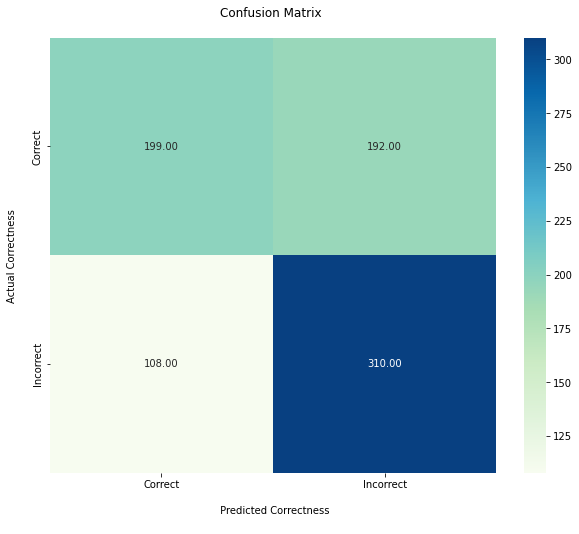

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,v_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, v_pred))
print('Precision:',precision_score(y_test, v_pred))
print('F1 score:', f1_score(y_test, v_pred))
print('Accuracy:',accuracy_score(y_test, v_pred))

recall: 0.7416267942583732
Precision: 0.6175298804780877
F1 score: 0.6739130434782609
Accuracy: 0.6291718170580964


# **ROC CURVE**

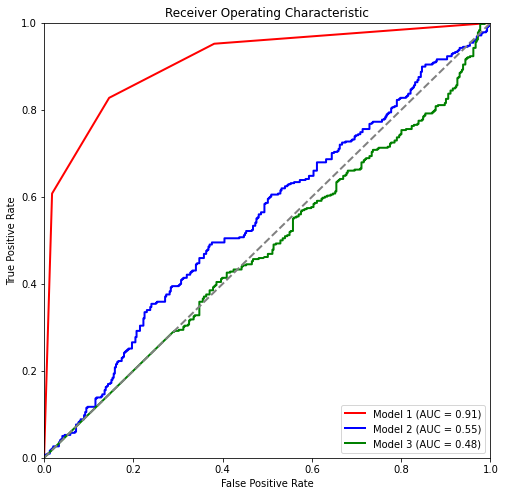

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define list of models
models = [knn_model, lr_model, mnb_model]

# Define colors for each model's curve
colors = ['red', 'blue', 'green', ...]

# Initialize plot
plt.figure(figsize=(8, 8))

# Plot ROC curve for each model
for i, model in enumerate(models):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='Model %d (AUC = %0.2f)' % (i+1, roc_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Show plot
plt.show()


# **Precision-Recall Curve**

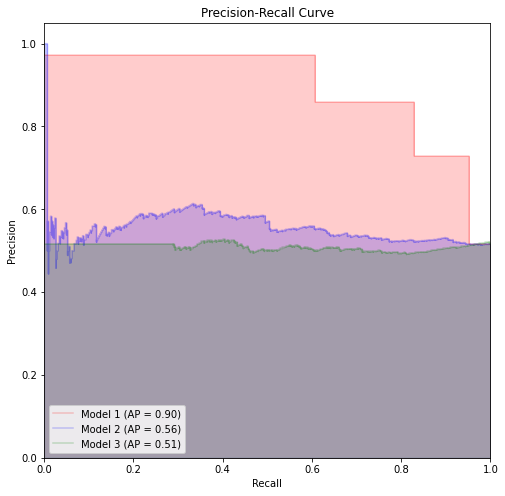

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Define list of models
models = [knn_model, lr_model, mnb_model]

# Define colors for each model's curve
colors = ['red', 'blue', 'green', ...]

# Initialize plot
plt.figure(figsize=(8, 8))

# Plot precision-recall curve for each model
for i, model in enumerate(models):
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)
    plt.step(recall, precision, color=colors[i], alpha=0.2, where='post',
             label='Model %d (AP = %0.2f)' % (i+1, average_precision))
    plt.fill_between(recall, precision, step='post', alpha=0.2, color=colors[i])

# Set plot properties 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Show plot
plt.show()
